# Project: Kepler Exoplanet Search Results

### The aim of this project is to investigate the features used in the classification of Exoplanets.

### What is an Exoplanet?

#### Exoplanets are planets that orbit around other stars.

Source: https://spaceplace.nasa.gov/all-about-exoplanets/en/

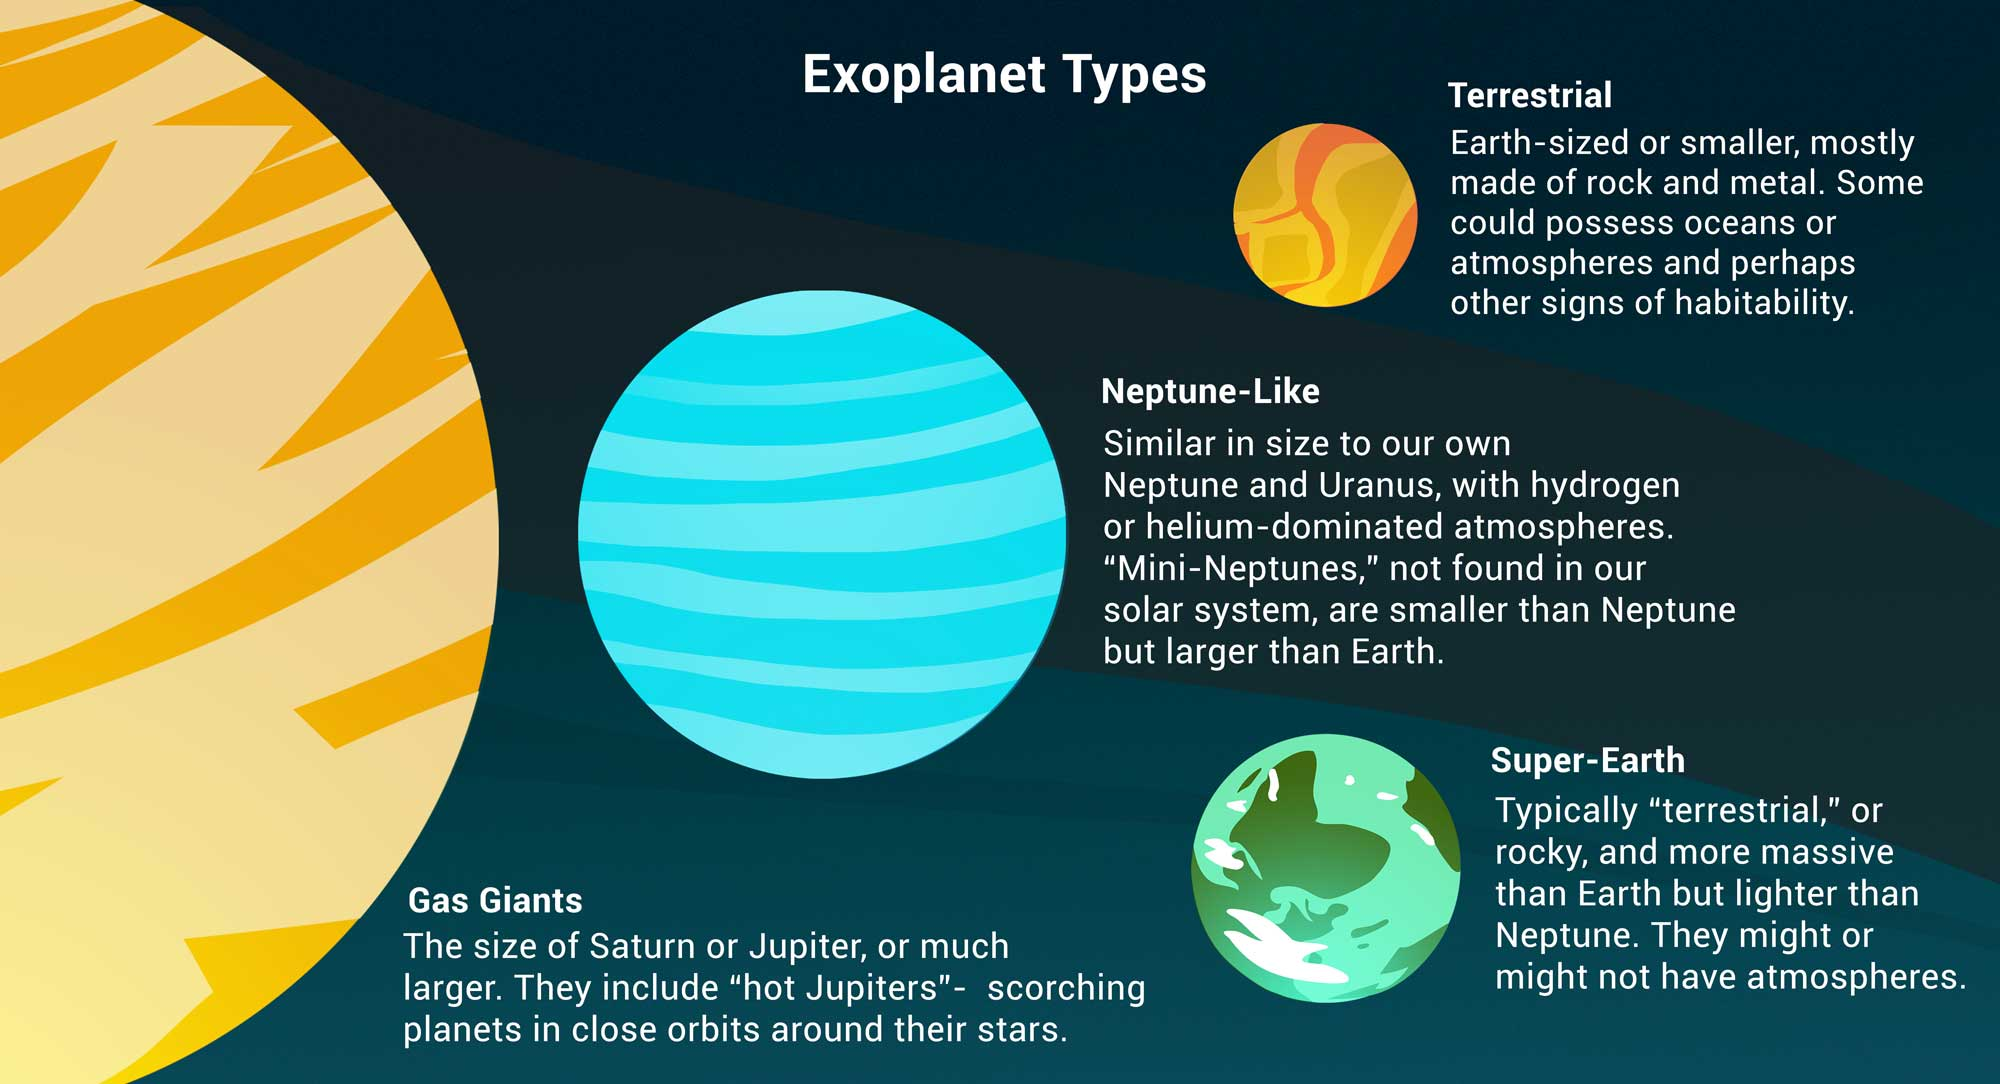

Soruce: https://exoplanets.nasa.gov/resources/2253/exoplanet-types-graphic/

# Project Workflow

### Below is the step-by-step process of this project from start to finish:

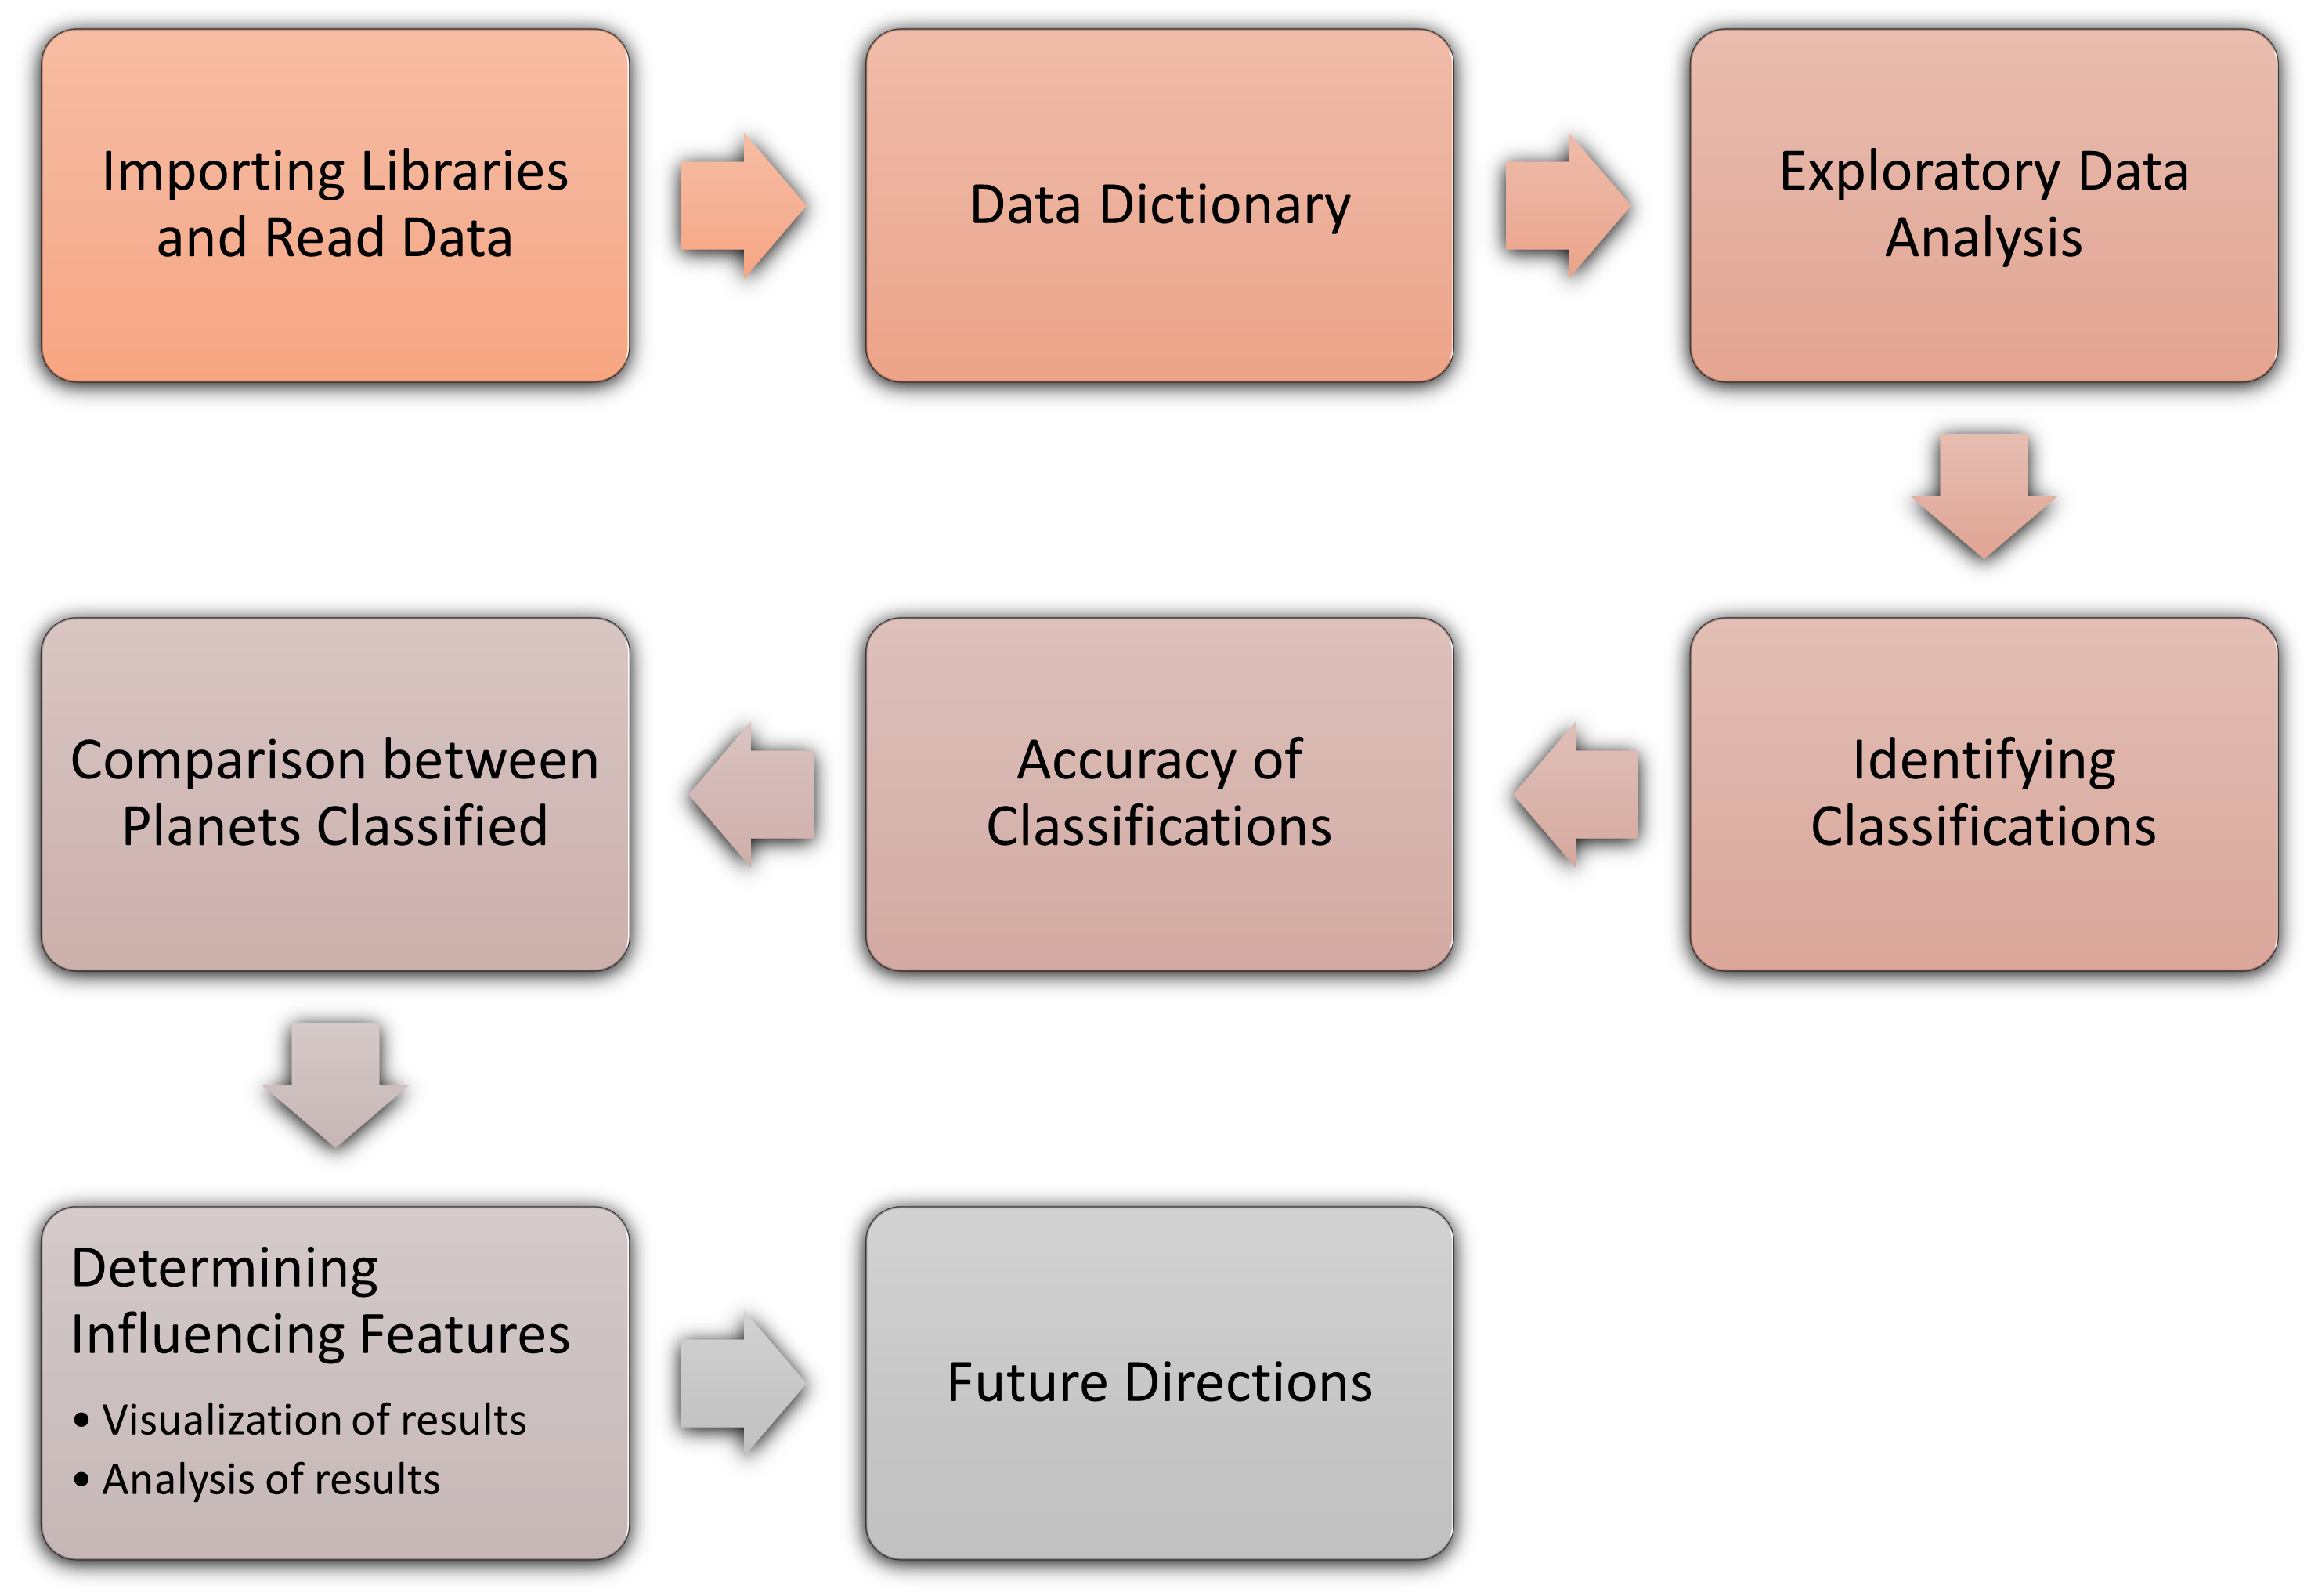

### Importing Libraries & Reading Data into Jupyter Notebook

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:/Users/Liam/Documents/Personal Projects/Project 3 - Keepler's Exoplanets/Files/cumulative.csv")

In [5]:
df.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


The data set seems fairly clean although there are very few missing data. This may be discussed later on in this project

## Data Dictionary

Below is the data dictionary for the dataset used in this project. It does not include the error columns but a full data dictionary that includes these columns can be found at the end of this project.

| Field Name | Tabel Name | Data Type | Description | Example |
|:- | :- | :- | :- | :- |
| rowid | - | Integer | A pseudocolumn that uniquely defines a single row in a database table. | 1 |
| kepid | Kepler Identification |Integer | Target identification number, as listed in the Kepler Input Catalog (KIC). | 10797460 |
| kepoi_name | KOI Name | String | A number used to identify and track a Kepler Object of Interest (KOI). | K00752.01 |
| kepler_name | Kepler Name | String | Kepler number name in the form "Kepler-N," plus a lower-case letter, identifying the planet. | Kepler-227 b | 
| koi_disposition | Exoplanet Archive Disposition | String | The category of this KOI from the Exoplanet Archive. | CONFIRMED |
| koi_pdisposition | Disposition Using Kepler Data | String | The pipeline flag that designates the most probable physical explanation of the KOI. | FALSE POSITIVE |
| koi_score | Disposition Score | Float | A value between 0 and 1 that indicates the confidence in the KOI disposition. | 0.969 |
| koi_fpflag_nt | Not Transit-Like Flag | Boolean | A KOI whose light curve is not consistent with that of a transiting planet. | 0 |
| koi_fpflag_ss	| Stellar Eclipse Flag | Boolean | A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. | 1 |
| koi_fpflag_co | Centroid Offset Flag | Boolean | The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture. | 0 |
| koi_fpflag_ec | Ephemeris Match Indicates Contamination Flag | Boolean | The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk. | 0 |
| koi_period | Orbital Period (days) | Float | The interval between consecutive planetary transits. | 6.094066 |
| koi_time0bk | Transit Epoch (BJD - 2,454,833.0) | Float | The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC. | 131.905560 |
| koi_impact | Impact Parameter | Float | The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius. | 0.0010 |
| koi_duration | Transit Duration (hours) | Float | The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. | 2.7100 |
| koi_depth | Transit Depth (parts per million) | Float | The fraction of stellar flux lost at the minimum of the planetary transit. | 4.5 | 
| koi_prad | Planetary Radius (Earth radii) | Float | The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius. | 1.19 | 
| koi_teq | Equilibrium Temperature (Kelvin) | Float | Approximation for the temperature of the planet. | 554.0 | 
| koi_insol | Insolation Flux [Earth flux] | Float | Insolation flux is another way to give the equilibrium temperature | 1.28  |
| koi_model_snr | Transit Signal-to-Noise | Float | Transit depth normalized by the mean uncertainty in the flux during the transits. | 9.8 |
| koi_tce_plnt_num | TCE Planet Number | Float | TCE Planet Number federated to the KOI. | 2.0 |
| koi_tce_delivname | TCE Delivery Name | String | TCE delivery name corresponding to the TCE data federated to the KOI. | q1_q17_dr25_tce | 
| koi_steff | Stellar Effective Temperature (Kelvin) | Float | The photospheric temperature of the star. | 5780.0 |
| koi_slogg | Stellar Surface Gravity (log10(cm s-2) | Float | The base-10 logarithm of the acceleration due to gravity at the surface of the star. | 4.438 |
| koi_srad | Stellar Radius (solar radii) | Float | The photospheric radius of the star. | 0.8653 |
| ra | RA (deg) | Float | KIC Right Ascension | 294.33847 |
| dec | Dec (deg) | Float | KIC Declination | 50.336540 |
| koi_kepmag | Kepler-band (mag) | Float | Kepler-band (mag) | 15.347 |

## Exploratory Data Analysis (EDA)

In [6]:
# set row id to be index
df = df.set_index('rowid')

In [7]:
df['koi_teq_err1'].isnull().sum()

9564

We can see from the data dictionary that the errors for koi_teq are both Nan. Therefore we can drop these columns but I but I will keep them in the dictionary for clarity when refering to the original dataset.

In [8]:
df = df.drop(['koi_teq_err1', 'koi_teq_err2'], axis=1)

In [9]:
df.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

It may be a good idea to investigate the correlation between the features in this dataset. However, before we do this it would make sense to remove the error columns. I will create a new name for the dataset specifically for correlation analysis so that it doesn't interfere with the first dataset used primarily in this project.

In [10]:
df_corr = df.drop(['koi_period_err1', 'koi_period_err2', 
                   'koi_time0bk_err1', 'koi_time0bk_err2',
                   'koi_impact_err1', 'koi_impact_err2',
                   'koi_duration_err1', 'koi_duration_err2',
                   'koi_depth_err1', 'koi_depth_err2',
                   'koi_prad_err1', 'koi_prad_err2',
                   'koi_insol_err1', 'koi_insol_err2',
                   'koi_steff_err1', 'koi_steff_err2',
                   'koi_slogg_err1', 'koi_slogg_err2',
                   'koi_srad_err1', 'koi_srad_err2'], 
                    axis=1)

In [11]:
df_corr.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname',
       'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

I think it would also be a good idea to drop the columns that are only used to reference the planets and have no affect on the classification.

In [12]:
df_corr = df_corr.drop(['kepid', 'kepoi_name', 'kepler_name',
                        'ra', 'dec', 'koi_kepmag'],
                         axis=1)

In [13]:
df_corr.columns

Index(['koi_disposition', 'koi_pdisposition', 'koi_score', 'koi_fpflag_nt',
       'koi_fpflag_ss', 'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period',
       'koi_time0bk', 'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad',
       'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_slogg', 'koi_srad'],
      dtype='object')

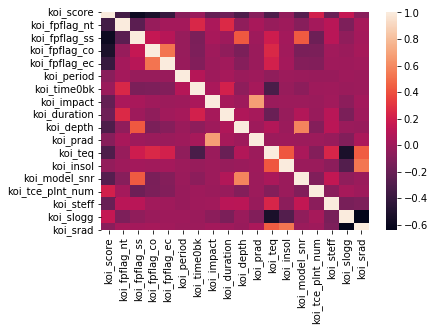

In [14]:
sns.heatmap(df_corr.corr(), annot = None)

In [15]:
#sns.pairplot(df_corr) (I would do this but it takes too long to run due to the large number of columns in the df)

In [16]:
df_corr.info

<bound method DataFrame.info of       koi_disposition koi_pdisposition  koi_score  koi_fpflag_nt  \
rowid                                                              
1           CONFIRMED        CANDIDATE      1.000              0   
2           CONFIRMED        CANDIDATE      0.969              0   
3      FALSE POSITIVE   FALSE POSITIVE      0.000              0   
4      FALSE POSITIVE   FALSE POSITIVE      0.000              0   
5           CONFIRMED        CANDIDATE      1.000              0   
...               ...              ...        ...            ...   
9560   FALSE POSITIVE   FALSE POSITIVE      0.000              0   
9561   FALSE POSITIVE   FALSE POSITIVE      0.000              0   
9562        CANDIDATE        CANDIDATE      0.497              0   
9563   FALSE POSITIVE   FALSE POSITIVE      0.021              0   
9564   FALSE POSITIVE   FALSE POSITIVE      0.000              0   

       koi_fpflag_ss  koi_fpflag_co  koi_fpflag_ec  koi_period  koi_time0bk  \
rowi

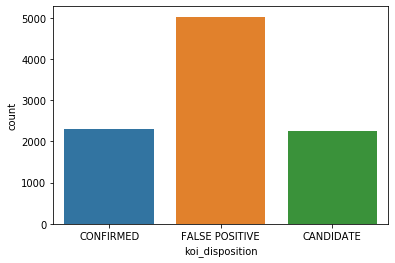

In [17]:
# notable columns: kepoi_name, kepler_name, koi_disposition, koi_pdisposition, koi_score
sns.countplot(x = df['koi_disposition'])

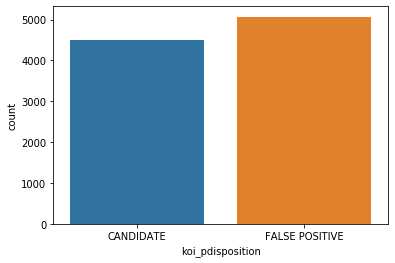

In [18]:
sns.countplot(x = df['koi_pdisposition'])

In [19]:
df['koi_score'].value_counts()

0.000    3482
1.000    1777
0.999     229
0.998     143
0.997     101
         ... 
0.441       1
0.756       1
0.737       1
0.464       1
0.255       1
Name: koi_score, Length: 650, dtype: int64

### Selecting data based on the Exoplanet classifications

In [20]:
# all confirmed exoplanets
confirmed_exo = df.loc[(df['koi_disposition'] == 'CONFIRMED') & (df['koi_pdisposition'] == 'CANDIDATE')]
confirmed_exo.head() # used head() so to not show all rows and make notebook cleaner

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
6,10872983,K00756.01,Kepler-228 d,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
7,10872983,K00756.02,Kepler-228 c,CONFIRMED,CANDIDATE,1.000,0,0,0,0,...,-232.0,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [21]:
# all exoplanet candidates
candidate_exo = df.loc[(df['koi_disposition'] == 'CANDIDATE') & (df['koi_pdisposition'] == 'CANDIDATE')]
candidate_exo.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
38,11138155,K00760.01,NaN,CANDIDATE,CANDIDATE,1.000,0,0,0,0,...,-77.0,4.359,0.110,-0.110,1.082,0.173,-0.130,292.16705,48.727589,15.263
59,11818800,K00777.01,NaN,CANDIDATE,CANDIDATE,0.999,0,0,0,0,...,-163.0,4.507,0.116,-0.105,0.781,0.116,-0.095,294.31686,50.080231,15.487
63,11918099,K00780.02,NaN,CANDIDATE,CANDIDATE,0.993,0,0,0,0,...,-79.0,4.595,0.012,-0.064,0.765,0.055,-0.028,293.83331,50.230350,15.334
64,9579641,K00115.03,NaN,CANDIDATE,CANDIDATE,0.871,0,0,0,0,...,-115.0,4.339,0.132,-0.108,1.087,0.157,-0.142,287.88733,46.276241,12.791
73,3246984,K00799.01,NaN,CANDIDATE,CANDIDATE,0.773,0,0,0,0,...,-172.0,4.410,0.124,-0.186,0.973,0.270,-0.145,294.36819,38.310280,15.279


In [22]:
# all NOT exoplanet candidates
not_exo = df.loc[(df['koi_disposition'] == 'FALSE POSITIVE')]
not_exo.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
9,6721123,K00114.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,1,0,...,-124.0,3.986,0.182,-0.098,1.958,0.322,-0.483,298.86435,42.151569,12.660
15,10419211,K00742.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,-172.0,4.554,0.033,-0.176,0.848,0.224,-0.075,297.07993,47.597401,15.472
16,10464078,K00743.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.0,0,1,0,0,...,-151.0,4.591,0.072,-0.048,0.680,0.072,-0.065,289.25821,47.635319,15.487


In [23]:
# all False BUT Candidate exoplanet candidates
false_pos_exo = df.loc[(df['koi_disposition'] == 'FALSE POSITIVE') & (df['koi_pdisposition'] == 'CANDIDATE')]
false_pos_exo.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,


There are no False Positive dispositions AND CANDIDATE pdisposition!

In [24]:
# Confirmed but then False negatives
false_exo = df.loc[(df['koi_disposition'] == 'CONFIRMED') & (df['koi_pdisposition'] == 'FALSE POSITIVE')]
false_exo.head()

,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
219,7434875,K00884.02,Kepler-247 d,CONFIRMED,FALSE POSITIVE,0.000,1,0,0,0,...,-152.0,4.597,0.025,-0.085,0.779,0.093,-0.053,288.64252,43.039291,15.067
235,11086270,K00124.01,Kepler-110 b,CONFIRMED,FALSE POSITIVE,0.415,0,1,0,0,...,-117.0,4.024,0.210,-0.105,1.626,0.254,-0.413,292.92914,48.602810,12.935
651,8561063,K00961.02,Kepler-42 c,CONFIRMED,FALSE POSITIVE,0.000,0,1,0,0,...,-24.0,5.215,0.053,-0.098,0.148,0.039,-0.017,292.21906,44.619160,15.920
676,6448890,K01241.02,Kepler-56 b,CONFIRMED,FALSE POSITIVE,0.098,1,0,0,0,...,-79.0,3.299,0.050,-0.041,4.361,0.296,-0.641,293.75836,41.871868,12.440
756,8751933,K01257.01,Kepler-420 b,CONFIRMED,FALSE POSITIVE,0.117,0,1,0,0,...,-83.0,4.323,0.132,-0.108,1.120,0.158,-0.158,291.22519,44.927380,14.651


## Now we will look into the koi_scores to determine how confident we are in the classifcations of the planets

### Here are the possible options of classifications from the dataset

confirmed_exo = Confirmed Exoplanet (Confirmed)

candidate_exo = Potential Exoplanet (Candidate in both columns)

not_exo = Confirmed NOT Exoplanet (False Positive)

false_pos_exo = Originally NOT but actually Candidate Exoplanet (False Positive AND Candidate)

false_exo = Confirmed BUT false positive Exoplanet (Confirmed AND False Positive)

### Important Note Regarding koi_scores:

For CANDIDATEs, a higher value indicates more confidence in its disposition, while for  FALSE POSITIVEs, a higher value indicates less confidence in that disposition.

For the CONFIRMED and CANDIDATE Exoplanets, I think that the koi_scores >= 0.75 would be the probability range where I would be confident in the accuracy of the classifications. 

For the NOT, NOT-BUT-CANDIDATE and FALSE-POSITVE Exoplanets, I think that the koi_scores <= 0.25 would be the probability range where I would be confident in the accuracy of the classifications.

Furthermore, if the percentage of confidence scores are above 70%, I would personally class the classifications as accurate and have confidence in the respective classification.

## Confirmed Exoplanets

In [25]:
# finding the number of koi_scores >= 0.75
grouped_con = (confirmed_exo['koi_score'] >= 0.75).value_counts()
print(grouped_con) 
print(f"Total number of rows: {grouped_con.sum()}")

True     2198
False      50
Name: koi_score, dtype: int64
Total number of rows: 2248


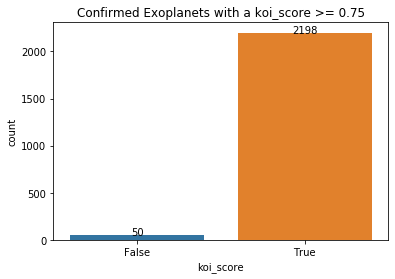

In [26]:
ax = sns.countplot(x = confirmed_exo['koi_score'] >= 0.75)
ax.set(title='Confirmed Exoplanets with a koi_score >= 0.75')

for p in ax.patches:
 height = p.get_height() # get the height of each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # Number of decimal points
 ha = 'center') # sets horizontal alignment (ha) to center

In [27]:
T1 = round((2190/2248)*100, 2)
F1 = round((50/2248)*100, 2)
print(f"The percentage of Confirmed exoplanets with a koi_score greater than or equal to 0.75: \n{T1}%")
print(f"The percentage of Confirmed exoplanets with a koi_score less than 0.75: \n{F1}%")

The percentage of Confirmed exoplanets with a koi_score greater than or equal to 0.75: 
97.42%
The percentage of Confirmed exoplanets with a koi_score less than 0.75: 
2.22%


#### We can see that ~ 97% of the confirmed exoplanets have a higher or equal koi_score than 0.75 whereas ~ 2% have a koi_score less than 0.75. As a result, we are confident in the classification of these planets as confirmed exoplanets.

## Candidate Exoplanets

In [28]:
grouped_cand = (candidate_exo['koi_score'] >= 0.75).value_counts()
print(grouped_cand)
print(f"Total number of rows: {grouped_con.sum()}")

True     1555
False     693
Name: koi_score, dtype: int64
Total number of rows: 2248


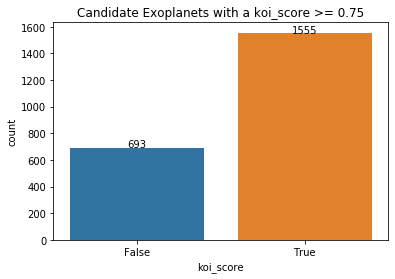

In [29]:
ax = sns.countplot(x = candidate_exo['koi_score'] >= 0.75)
ax.set(title='Candidate Exoplanets with a koi_score >= 0.75')

for p in ax.patches:
 height = p.get_height() # get the height of each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # Number of decimal points
 ha = 'center') # sets horizontal alignment (ha) to center

In [30]:
T2 = round((1555/2248)*100, 2)
F2 = round((693/2248)*100, 2)
print(f"The percentage of candidate exoplanets with a koi_score greater than or equal to 0.75: \n{T2}%")
print(f"The percentage of candidate exoplanets with a koi_score less than 0.75: \n{F2}%")

The percentage of candidate exoplanets with a koi_score greater than or equal to 0.75: 
69.17%
The percentage of candidate exoplanets with a koi_score less than 0.75: 
30.83%


#### We can see that ~ 69% of the candidate exoplanets have a higher or equal koi_score of 0.75 whereas ~ 31% have a koi_score less than 0.75. As a result, we are confident in the classification of these planets as candidate exoplanets.

## Not Exoplanets

In [31]:
grouped_not = (not_exo['koi_score'] <= 0.25).value_counts()
print(grouped_not)
print(f"Total number of rows: {grouped_not.sum()}")

True     3885
False    1138
Name: koi_score, dtype: int64
Total number of rows: 5023


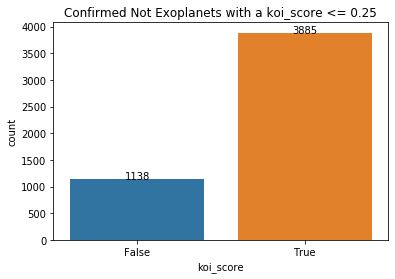

In [32]:
ax = sns.countplot(x =not_exo['koi_score'] <= 0.25)
ax.set(title='Confirmed Not Exoplanets with a koi_score <= 0.25')

for p in ax.patches:
 height = p.get_height() # get the height of each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # Number of decimal points
 ha = 'center') # sets horizontal alignment (ha) to center

In [33]:
T3 = round((3885/5023)*100, 2)
F3 = round((1138/5023)*100, 2)
print(f"The percentage of Not exoplanets with a koi_score less than or equal to 0.25: \n{T3}%")
print(f"The percentage of Not exoplanets with a koi_score greater than 0.25: \n{F3}%")

The percentage of Not exoplanets with a koi_score less than or equal to 0.25: 
77.34%
The percentage of Not exoplanets with a koi_score greater than 0.25: 
22.66%


#### We can see that ~ 77% of the candidate exoplanets have a less than or equal koi_score of 0.25 whereas ~ 23% have a koi_score more than 0.25. As a result, we are confident in the classification of these planets as not exoplanets.

## Originally Not Exoplanets but potential Candidates

In [34]:
grouped_not_cand = (false_pos_exo['koi_score'] >= 0.25).value_counts()
print(grouped_not_cand)
print(f"Total number of rows: {grouped_not_cand.sum()}")

Series([], Name: koi_score, dtype: int64)
Total number of rows: 0


#### Obviously there are no planets which are classed as such because if they are classed as not exoplanets they can't also be candidates! This also means that we shouldn't and can't create a plot of the results if there aren't any!

## False Positive Exoplanets

In [35]:
grouped_false = (false_exo['koi_score'] <= 0.75).value_counts() # 0.75 because they were originally confirmed
print(grouped_false)
print(f"Total number of rows: {grouped_false.sum()}")

True     44
False     1
Name: koi_score, dtype: int64
Total number of rows: 45


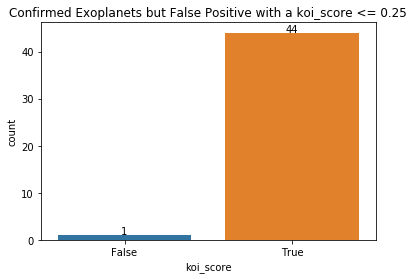

In [36]:
ax = sns.countplot(x =false_exo['koi_score'] <= 0.75)
ax.set(title='Confirmed Exoplanets but False Positive with a koi_score <= 0.25')

for p in ax.patches:
 height = p.get_height() # get the height of each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+.2, # y-coordinate position of data label, padded 0.2 above bar
 s = '{:.0f}'.format(height), # Number of decimal points
 ha = 'center') # sets horizontal alignment (ha) to center

In [37]:
T4 = round((44/45)*100, 2)
F4 = round((1/45)*100, 2)
print(f"The percentage of Not exoplanets with a koi_score less than or equal to 0.25: \n{T4}%")
print(f"The percentage of Not exoplanets with a koi_score greater than 0.25: \n{F4}%")

The percentage of Not exoplanets with a koi_score less than or equal to 0.25: 
97.78%
The percentage of Not exoplanets with a koi_score greater than 0.25: 
2.22%


#### We can see that ~ 98% of the Flase positive exoplanets have a greater than or equal koi_score of 0.75 whereas ~ 2% have a koi_score less than 0.75. As a result, we are confident in the classification of these planets as false positive exoplanets.

## Conclusion based on the classifications

Based on the analysis conducted above and the results for the probability of accuracy for each case, I am confident in each classification respectively.

## Investigating the difference between the number of planets confirmed as Exoplanets and the number that are not Exoplanets


FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: koi_disposition, dtype: int64


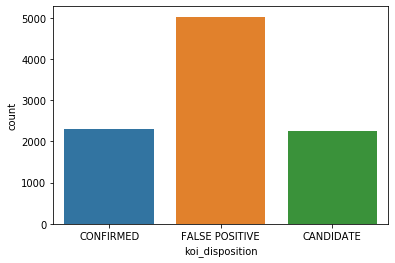

In [38]:
sns.countplot(x = df['koi_disposition'])
print()
print(df['koi_disposition'].value_counts())

In [39]:
num_p = len(df)
print(f"The total number of planets in this dataset are: {num_p}")

The total number of planets in this dataset are: 9564


In [40]:
num_conf = round((2293/9564)*100, 2)
num_false = round((5023/9564)*100, 2)
num_cand = round((2248/9564)*100, 2)

print(f"The distribution of class in this dataset are:")
print(f"Confirmed: {num_conf}% \nFalse: {num_false}% \nCandidate: {num_cand}%")

The distribution of class in this dataset are:
Confirmed: 23.98% 
False: 52.52% 
Candidate: 23.5%


#### There are more plantes classed as not exoplanets (false positive) than the planets classed as exoplanets (confirmed) and candidate exoplanets (candidate) put together.

## Investigating the average values of the features for the planets with each classification to determine the features which influence the classification.

#### The classifications to be investigated are from the columns [koi_disposition] and [koi_disposition].

confirmed_exo = Confirmed Exoplanet (Confirmed)

candidate_exo = Potential Exoplanet (Candidate in both columns)

not_exo = Confirmed NOT Exoplanet (False Positive)

false_exo = Confirmed BUT false positive Exoplanet (Confirmed AND False Positive)

In [41]:
confirmed_exo.columns

Index(['kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_insol', 'koi_insol_err1',
       'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

We should drop the ID columns for all 4 sub datasets because they are only used to identify individual planets and so not needed here. Also, to make things easier we will also drop the error columns.

In [42]:
# The error columns to drop are the following:
'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 
'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1''koi_duration_err2',
'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 
'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 
'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'

('koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2')

In [43]:
confirmed_exo_feat = confirmed_exo.drop(['kepid', 'kepoi_name', 'kepler_name',
                                        'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 
                                        'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1','koi_duration_err2',
                                        'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 
                                        'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 
                                        'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2']
                                        , axis=1)
candidate_exo_feat = candidate_exo.drop(['kepid', 'kepoi_name', 'kepler_name',
                                        'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 
                                        'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1','koi_duration_err2',
                                        'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 
                                        'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 
                                        'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'], 
                                        axis=1)
not_exo_feat = not_exo.drop(['kepid', 'kepoi_name', 'kepler_name',
                            'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 
                            'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1','koi_duration_err2',
                            'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 
                            'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 
                            'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'], 
                            axis=1)
false_exo_feat = false_exo.drop(['kepid', 'kepoi_name', 'kepler_name',
                                'koi_period_err1', 'koi_period_err2', 'koi_time0bk_err1', 'koi_time0bk_err2', 
                                'koi_impact_err1', 'koi_impact_err2', 'koi_duration_err1','koi_duration_err2',
                                'koi_depth_err1', 'koi_depth_err2', 'koi_prad_err1', 'koi_prad_err2', 
                                'koi_insol_err1', 'koi_insol_err2', 'koi_steff_err1', 'koi_steff_err2', 
                                'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad_err1', 'koi_srad_err2'], 
                                axis=1)

In [44]:
confirmed_exo_feat.head()

,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,...,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_tce_delivname,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
rowid,,,,,,,,,,,,,,,,,,,,,
1,CONFIRMED,CANDIDATE,1.000,0,0,0,0,9.488036,170.53875,0.146,...,93.59,35.8,1.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
2,CONFIRMED,CANDIDATE,0.969,0,0,0,0,54.418383,162.51384,0.586,...,9.11,25.8,2.0,q1_q17_dr25_tce,5455.0,4.467,0.927,291.93423,48.141651,15.347
5,CONFIRMED,CANDIDATE,1.000,0,0,0,0,2.525592,171.59555,0.701,...,926.16,40.9,1.0,q1_q17_dr25_tce,6031.0,4.438,1.046,288.75488,48.226200,15.509
6,CONFIRMED,CANDIDATE,1.000,0,0,0,0,11.094321,171.20116,0.538,...,114.81,66.5,1.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714
7,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.134435,172.97937,0.762,...,427.65,40.2,2.0,q1_q17_dr25_tce,6046.0,4.486,0.972,296.28613,48.224670,15.714


In [45]:
confirmed_exo_feat_av = confirmed_exo_feat.mean(axis=0)
candidate_exo_feat_av = candidate_exo_feat.mean(axis=0)
not_exo_feat_av = not_exo_feat.mean(axis=0)
false_exo_feat_av = false_exo_feat.mean(axis=0)

In [46]:
# need to convert these from series to df
confirmed_exo_feat_av = pd.DataFrame(confirmed_exo_feat_av)
candidate_exo_feat_av = pd.DataFrame(candidate_exo_feat_av)
not_exo_feat_av = pd.DataFrame(not_exo_feat_av)
false_exo_feat_av = pd.DataFrame(false_exo_feat_av)

In [47]:
# Renamimg the columns of each to represent the classification the data represents
confirmed_exo_feat_av.columns = ['Confirmed']
candidate_exo_feat_av.columns = ['Candidate']
not_exo_feat_av.columns = ['Confirmed Not']
false_exo_feat_av.columns = ['False Positive'] # initially confirmed/candidate but falsely classed

In [48]:
# Joining the dataframes (on index) into one dataframe so we can compare. This could probably be done more efficiently but
# this way is the easiest one I know at the moment i.e doing each join seperately

fst_join = confirmed_exo_feat_av.join(candidate_exo_feat_av) # first join
scd_join = fst_join.join(not_exo_feat_av) # second join
trd_join = scd_join.join(false_exo_feat_av) # third join

average_data_class = trd_join # renaming the df so it makes more sense

In [49]:
average_data_class 

,Confirmed,Candidate,Confirmed Not,False Positive
koi_score,0.979740,0.900210,0.014899,0.091045
koi_fpflag_nt,0.000000,0.000000,0.354171,0.466667
koi_fpflag_ss,0.004448,0.014235,0.429425,0.355556
koi_fpflag_co,0.000000,0.000000,0.369898,0.133333
koi_fpflag_ec,0.000000,0.000000,0.228350,0.022222
koi_period,25.871861,130.523850,73.312227,86.577728
koi_time0bk,156.965167,170.431268,168.354269,172.131842
koi_impact,0.426838,0.537091,0.976294,0.423114
koi_duration,4.262790,4.827392,6.576427,6.598247
koi_depth,1117.396619,1864.238856,44922.634356,2370.168182


In [50]:
# I will transpose the above df so I can produce plots easily
average_data_class_T = average_data_class.transpose()
average_data_class_T

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,...,koi_teq,koi_insol,koi_model_snr,koi_tce_plnt_num,koi_steff,koi_slogg,koi_srad,ra,dec,koi_kepmag
Confirmed,0.979740,0.000000,0.004448,0.000000,0.000000,25.871861,156.965167,0.426838,4.262790,1117.396619,...,838.390125,344.162731,87.884164,1.447568,5479.683274,4.412997,1.059655,290.941233,44.379417,14.345517
Candidate,0.900210,0.000000,0.014235,0.000000,0.000000,130.523850,170.431268,0.537091,4.827392,1864.238856,...,882.420137,5357.021226,45.595789,1.294819,5639.766590,4.331481,1.566311,291.789595,43.949490,14.338148
Confirmed Not,0.014899,0.354171,0.429425,0.369898,0.228350,73.312227,168.354269,0.976294,6.576427,44922.634356,...,1298.744920,12398.672006,442.452773,1.120370,5848.872566,4.251485,2.125097,292.692662,43.494583,14.198609
False Positive,0.091045,0.466667,0.355556,0.133333,0.022222,86.577728,172.131842,0.423114,6.598247,2370.168182,...,876.704545,682.931136,89.922727,1.636364,5390.659091,4.296159,1.418727,290.872377,43.695756,13.914111


## Producing Visualizations of each feature column for all four classifications

#### The visualizations will all be bar charts because this type of plot is the best for comparisons.

The datavalues in this plot are: 
Confirmed         0.000000
Candidate         0.000000
Confirmed Not     0.354171
False Positive    0.466667
Name: koi_fpflag_nt, dtype: float64


Text(0.5, 1.0, 'Not Transit-Like Flag')

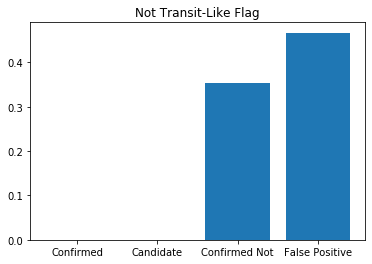

In [51]:
H2 = average_data_class_T['koi_fpflag_nt']
print(f"The datavalues in this plot are: \n{H2}")
plt.bar(x=average_data_class.columns, height=H2)
plt.title('Not Transit-Like Flag')

The datavalues in this plot are: 
Confirmed         0.004448
Candidate         0.014235
Confirmed Not     0.429425
False Positive    0.355556
Name: koi_fpflag_ss, dtype: float64


Text(0.5, 1.0, 'Stellar Eclipse Flag')

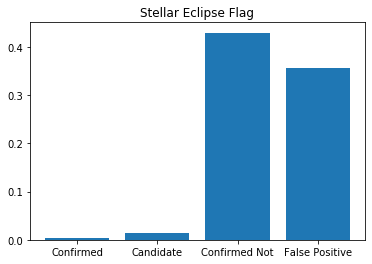

In [52]:
H3 = average_data_class_T['koi_fpflag_ss']
print(f"The datavalues in this plot are: \n{H3}")
plt.bar(x=average_data_class.columns, height=H3)
plt.title('Stellar Eclipse Flag')

The datavalues in this plot are: 
Confirmed         0.000000
Candidate         0.000000
Confirmed Not     0.369898
False Positive    0.133333
Name: koi_fpflag_co, dtype: float64


Text(0.5, 1.0, 'Centroid Offset Flag')

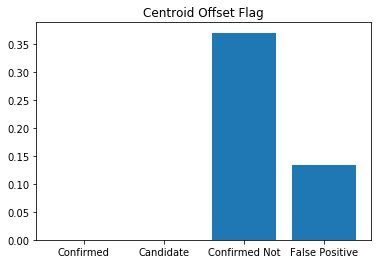

In [53]:
H4 = average_data_class_T['koi_fpflag_co']
print(f"The datavalues in this plot are: \n{H4}")
plt.bar(x=average_data_class.columns, height=H4)
plt.title('Centroid Offset Flag')

The datavalues in this plot are: 
Confirmed         0.000000
Candidate         0.000000
Confirmed Not     0.228350
False Positive    0.022222
Name: koi_fpflag_ec, dtype: float64


Text(0.5, 1.0, 'Ephemeris Match Indicates Contamination Flag')

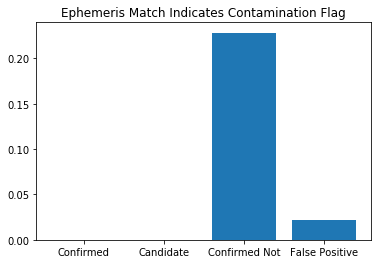

In [54]:
H5 = average_data_class_T['koi_fpflag_ec']
print(f"The datavalues in this plot are: \n{H5}")
plt.bar(x=average_data_class.columns, height=H5)
plt.title('Ephemeris Match Indicates Contamination Flag')

The datavalues in this plot are: 
Confirmed          25.871861
Candidate         130.523850
Confirmed Not      73.312227
False Positive     86.577728
Name: koi_period, dtype: float64


Text(0.5, 1.0, 'Orbital Period (days)')

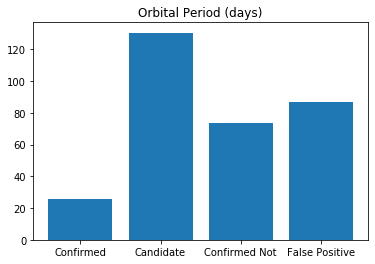

In [55]:
H6 = average_data_class_T['koi_period']
print(f"The datavalues in this plot are: \n{H6}")
plt.bar(x=average_data_class.columns, height=H6)
plt.title('Orbital Period (days)')

The datavalues in this plot are: 
Confirmed         156.965167
Candidate         170.431268
Confirmed Not     168.354269
False Positive    172.131842
Name: koi_time0bk, dtype: float64


Text(0.5, 1.0, 'Transit Epoch')

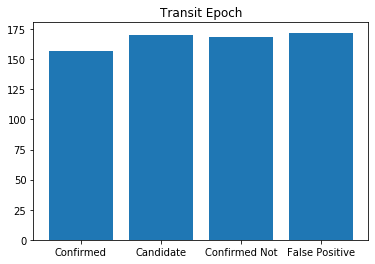

In [56]:
H7 = average_data_class_T['koi_time0bk']
print(f"The datavalues in this plot are: \n{H7}")
plt.bar(x=average_data_class.columns, height=H7)
plt.title('Transit Epoch')

The datavalues in this plot are: 
Confirmed         0.426838
Candidate         0.537091
Confirmed Not     0.976294
False Positive    0.423114
Name: koi_impact, dtype: float64


Text(0.5, 1.0, 'Impact Parameter')

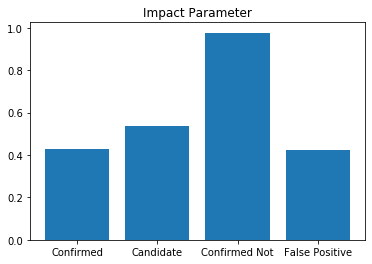

In [57]:
H8 = average_data_class_T['koi_impact']
print(f"The datavalues in this plot are: \n{H8}")
plt.bar(x=average_data_class.columns, height=H8)
plt.title('Impact Parameter')

The datavalues in this plot are: 
Confirmed         4.262790
Candidate         4.827392
Confirmed Not     6.576427
False Positive    6.598247
Name: koi_duration, dtype: float64


Text(0.5, 1.0, 'Transit Duration (hours)')

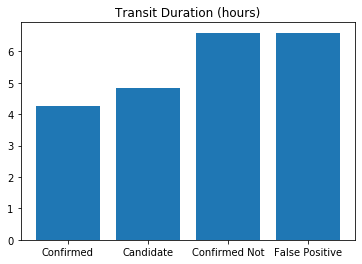

In [58]:
H9 = average_data_class_T['koi_duration']
print(f"The datavalues in this plot are: \n{H9}")
plt.bar(x=average_data_class.columns, height=H9)
plt.title('Transit Duration (hours)')

The datavalues in this plot are: 
Confirmed          1117.396619
Candidate          1864.238856
Confirmed Not     44922.634356
False Positive     2370.168182
Name: koi_depth, dtype: float64


Text(0.5, 1.0, 'Transit Depth (parts per million)')

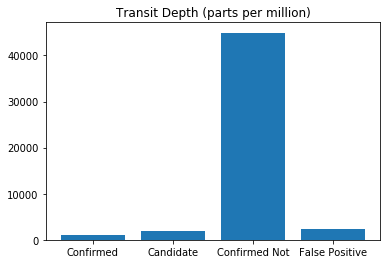

In [59]:
H10 = average_data_class_T['koi_depth']
print(f"The datavalues in this plot are: \n{H10}")
plt.bar(x=average_data_class.columns, height=H10)
plt.title('Transit Depth (parts per million)')

The datavalues in this plot are: 
Confirmed           2.818919
Candidate          15.931465
Confirmed Not     191.641693
False Positive      5.561591
Name: koi_prad, dtype: float64


Text(0.5, 1.0, 'Planetary Radius (Earth radii)')

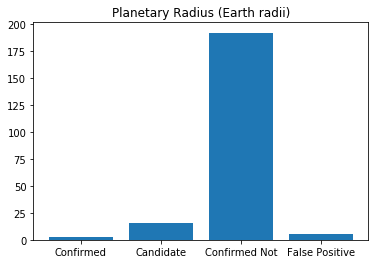

In [60]:
H11 = average_data_class_T['koi_prad']
print(f"The datavalues in this plot are: \n{H11}")
plt.bar(x=average_data_class.columns, height=H11)
plt.title('Planetary Radius (Earth radii)')

The datavalues in this plot are: 
Confirmed          838.390125
Candidate          882.420137
Confirmed Not     1298.744920
False Positive     876.704545
Name: koi_teq, dtype: float64


Text(0.5, 1.0, 'Equilibrium Temperature (Kelvin)')

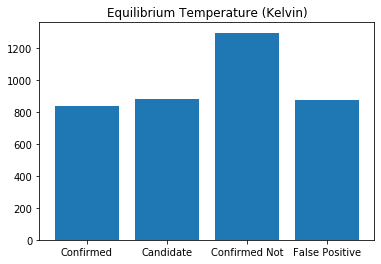

In [61]:
H12 = average_data_class_T['koi_teq']
print(f"The datavalues in this plot are: \n{H12}")
plt.bar(x=average_data_class.columns, height=H12)
plt.title('Equilibrium Temperature (Kelvin)')

The datavalues in this plot are: 
Confirmed           344.162731
Candidate          5357.021226
Confirmed Not     12398.672006
False Positive      682.931136
Name: koi_insol, dtype: float64


Text(0.5, 1.0, 'Insolation Flux [Earth flux]')

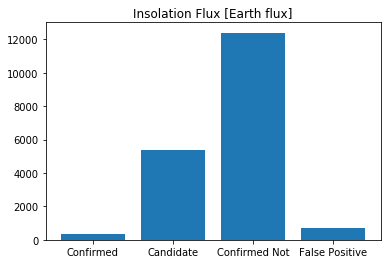

In [62]:
H13 = average_data_class_T['koi_insol']
print(f"The datavalues in this plot are: \n{H13}")
plt.bar(x=average_data_class.columns, height=H13)
plt.title('Insolation Flux [Earth flux]')

The datavalues in this plot are: 
Confirmed          87.884164
Candidate          45.595789
Confirmed Not     442.452773
False Positive     89.922727
Name: koi_model_snr, dtype: float64


Text(0.5, 1.0, 'Transit Signal-to-Noise')

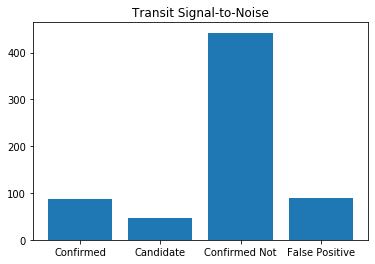

In [63]:
H14 = average_data_class_T['koi_model_snr']
print(f"The datavalues in this plot are: \n{H14}")
plt.bar(x=average_data_class.columns, height=H14)
plt.title('Transit Signal-to-Noise')

The datavalues in this plot are: 
Confirmed         1.447568
Candidate         1.294819
Confirmed Not     1.120370
False Positive    1.636364
Name: koi_tce_plnt_num, dtype: float64


Text(0.5, 1.0, 'TCE Planet Number')

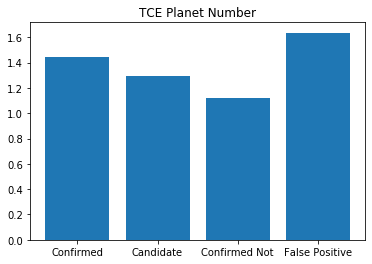

In [64]:
H15 = average_data_class_T['koi_tce_plnt_num']
print(f"The datavalues in this plot are: \n{H15}")
plt.bar(x=average_data_class.columns, height=H15)
plt.title('TCE Planet Number')

The datavalues in this plot are: 
Confirmed         5479.683274
Candidate         5639.766590
Confirmed Not     5848.872566
False Positive    5390.659091
Name: koi_steff, dtype: float64


Text(0.5, 1.0, 'Stellar Effective Temperature (Kelvin)')

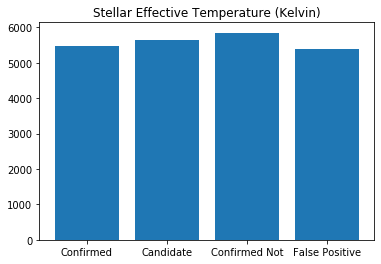

In [65]:
H16 = average_data_class_T['koi_steff']
print(f"The datavalues in this plot are: \n{H16}")
plt.bar(x=average_data_class.columns, height=H16)
plt.title('Stellar Effective Temperature (Kelvin)')

The datavalues in this plot are: 
Confirmed         4.412997
Candidate         4.331481
Confirmed Not     4.251485
False Positive    4.296159
Name: koi_slogg, dtype: float64


Text(0.5, 1.0, 'Stellar Surface Gravity (log10(cm s-2)')

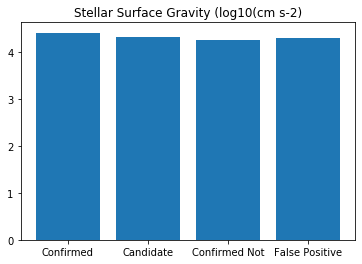

In [66]:
H17 = average_data_class_T['koi_slogg']
print(f"The datavalues in this plot are: \n{H17}")
plt.bar(x=average_data_class.columns, height=H17)
plt.title('Stellar Surface Gravity (log10(cm s-2)')

The datavalues in this plot are: 
Confirmed         1.059655
Candidate         1.566311
Confirmed Not     2.125097
False Positive    1.418727
Name: koi_srad, dtype: float64


Text(0.5, 1.0, 'Stellar Radius (solar radii)')

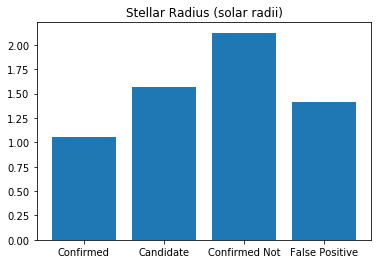

In [67]:
H18 = average_data_class_T['koi_srad']
print(f"The datavalues in this plot are: \n{H18}")
plt.bar(x=average_data_class.columns, height=H18)
plt.title('Stellar Radius (solar radii)')

The datavalues in this plot are: 
Confirmed         290.941233
Candidate         291.789595
Confirmed Not     292.692662
False Positive    290.872377
Name: ra, dtype: float64


Text(0.5, 1.0, 'KIC Right Ascension (deg)')

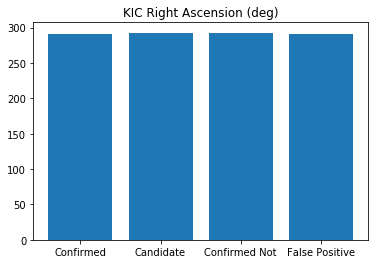

In [68]:
H19 = average_data_class_T['ra']
print(f"The datavalues in this plot are: \n{H19}")
plt.bar(x=average_data_class.columns, height=H19)
plt.title('KIC Right Ascension (deg)')

The datavalues in this plot are: 
Confirmed         44.379417
Candidate         43.949490
Confirmed Not     43.494583
False Positive    43.695756
Name: dec, dtype: float64


Text(0.5, 1.0, 'KIC Declination (deg)')

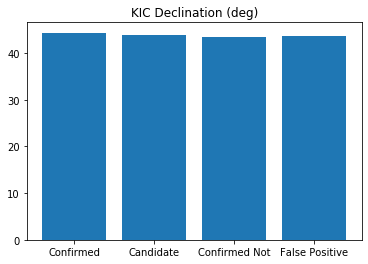

In [69]:
H20 = average_data_class_T['dec']
print(f"The datavalues in this plot are: \n{H20}")
plt.bar(x=average_data_class.columns, height=H20)
plt.title('KIC Declination (deg)')

The datavalues in this plot are: 
Confirmed         14.345517
Candidate         14.338148
Confirmed Not     14.198609
False Positive    13.914111
Name: koi_kepmag, dtype: float64


Text(0.5, 1.0, 'Kepler-band (mag)')

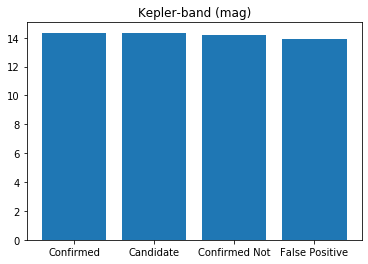

In [70]:
H21 = average_data_class_T['koi_kepmag']
print(f"The datavalues in this plot are: \n{H21}")
plt.bar(x=average_data_class.columns, height=H21)
plt.title('Kepler-band (mag)')

### Analysis of the Average Results for each classification

#### From the 20 graphs shown above, 6 of them show consistent values across all classification and therefore has little to no influence on the classification of the planet. The features represented by the 6 graphs were:
1. Transit Epoch = The time corresponding to the center of the first detected transit minus a constant offset.
2. Stellar Effective Temperature (Kelvin) = The photospheric temperature of the star.
3. Stellar Surface Gravity (log10(cm s-2)) = The base-10 logarithm of the acceleration due to gravity at the surface of the star.
4. KIC Right Ascension (deg) = KIC Right Ascension
5. KIC Declination (deg) = KIC Declination
6. Kepler-band (mag) = Kepler-band (mag)

#### From the 20 graphs above, 14 of them show disimilar results across each classification and thus it can be argued that these features represented by each graph, are the features that influence the classification of exoplanets. These 14 graphs were:
1. Not Transit-Like Flag = A KOI whose light curve is not consistent with that of a transiting planet.
2. Stellar Eclipse Flag = A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability.
3. Centroid Offset Flag = The source of the signal is from a nearby star.
4. Ephemeris Match Indicates Contamination Flag = The KOI shares the same period and epoch as another object.
5. Orbital Period (days) = The interval between consecutive planetary transits.
6. Impact Parameter = The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction.
7. Transit Duration (hours) = The duration of the observed transits.
8. Transit Depth (parts per million) = The fraction of stellar flux lost at the minimum of the planetary transit.
9. Planetary Radius (Earth radii) = The radius of the planet.
10. Equilibrium Temperature (Kelvin) = Approximation for the temperature of the planet.
11. Insolation Flux [Earth flux] = Insolation flux is another way to give the equilibrium temperature
12. Transit Signal-to-Noise = Transit depth normalized by the mean uncertainty in the flux during the transits.
13. TCE Planet Number = TCE Planet Number federated to the KOI.
14. Stellar Radius (solar radii) = The photospheric radius of the star.

#### From the 14 features that influence the classification, the most influencial features (most disparity between the classifications) were:

1. Not Transit-Like Flag
2. Stellar Eclipse Flag
3. Centroid Offset Flag
4. Ephemeris Match Indicates Contamination Flag
5. Orbital Period (days)
6. Transit Depth (parts per million)
7. Planetary Radius (Earth radii)
8. Insolation Flux [Earth flux]
9. Transit Signal-to-Noise

#### Not Transit-Like Flag

This means that the planet does not cross infront of another object (e.g star). The confirmed and candidate classifications show a value of zero for this feature. This means that for a planet to be classed as an exoplanet or a candidate, it must transit another object. This makes sense because as we are told, in order for a planet to sustain life, it must be heated by an external object to a temperature suitable to sustain life. And so, if there is no object for the planet to transit, it would not be able to absorb the radiation from said object and therefore be unlikely to sustain life.

#### Stellar Eclipse Flag

This also refers to the measurement of the planet transiting another object. It states that this indicates that the transit-like effect is caused by an eclipsing binary. So, the siginifcance of this feature is similar to the Non Transit-Like Flag feature indicating that Exoplanets must transit other objects. From the data, the confirmed and candidate classed planets have a Stellar Eclipse Flag very close to zero, whereas the confirmed not and false positive classed planets have a relatively higher Stellar Eclipse Flag.

#### Centroid Offset Flag

This refers to the source of the signal from which data is collected is from a nearby star. In the graph, the confirmed and candidate planets have a value of zero for this feature whereas the confirmed not and false positive planets have a positve value for this feature. This means that for a planet to be classed as an exoplanet, the source of the signal must not be from a nearby star. 

#### Ephemeris Match Indicates Contamination Flag

This feature means that the planet shares the same period and epoch as another object and is judged to be the result of flux on the measurement equipment. Again, the data for the planets classed as confirmed and candidates show a value of zero whereas the confirmed not and false postive classed planets show a positve value. This means that in order for a planet to be classed as or potentially as an exoplanet, it must not share the same period and epoch as another object.

#### Orbital Period (days)

This refers to the interval between consecutive planetary transits. From the graph, the planets classified as confirmed exoplanets have an average orbital period of 25.9 days, the planets classified as candidate exoplanets have an average orbital period of 130.5 days, the planets classified as Not exoplanets have an average orbital period of 73.3 days and the planets that are classified as flase positives have an average orbital period of 86.6 days. These results show that this feature has a clear influence upon the clasification of a planet.

#### Transit Depth (parts per million)

This feature refers to the fraction of stellar flux lost at the minimum of the planetary transit. From the graph showing the average values of this feature for each classification, there is a clear differnce between all potential exoplanets (confirmed, candidate and False positive) and the confirmed not exoplanets. The graph shows that if a planet has a Transit Depth value greater than 3000 ppm, it will be classed an not an exoplanet. This indicates that this feature is very influential in the classification of planets.

#### Planetary Radius (Earth radii)

This feature refers to the radius of the planet. The graph showing the average values of this feature for each classification shows that for a planet to be an exoplanet, it must have a relatively small planetary (Earth Radius) radius and that planets that have a planetary radius significantly greater than that of the Earth (~ x191 Earth r), it will be classed as not an exoplanet. Therefore, planetary radius has a significant influence upon the classification of exoplanets.

#### Insolation Flux [Earth flux]

This feature refers to equilibrium temperature. The graph showing the data for this feature shows that planets classified as confirmed exoplanets have an average isolation flux of 344.2, the planets classified as candidate exoplanets have an average isolation flux of 5357.0, the planets classified as not exoplanets have an average isolation flux of 12398.7 and the planets that are classified as flase positives have an average insolation flux of 682.9. From this, planets with a realtively low insolation flux are classed initially as exoplanets but if the planet has an isolation flux ~ 12400, it is classified as not an exoplanet. Thus, insolation flux does have a significant influence on the classification of an exoplanet.

#### Transit Signal-to-Noise

This feature refers to the normalization of transit depth. From the graph of the average results for this feature, planets with a value ~ 440 will be classed as not an exoplanet and planets with a value between 45 and 88 will be classed as an exoplanet or a candidate exoplanet. From this, it can be concluded that Transit Signal-to-noise has significant influence upon the clasification of exoplanets. 

# Future Directions

To further this project, a Machine Learning model could be tested and applied to the data to predict the classification of a planet based on the values of the same features.

# Full Data Dictionary

Data dictionary including the error columns:

| Field Name | Tabel Name | Data Type | Description | Example |
|:- | :- | :- | :- | :- |
| rowid | - | Integer | A pseudocolumn that uniquely defines a single row in a database table. | 1 |
| kepid | Kepler Identification |Integer | Target identification number, as listed in the Kepler Input Catalog (KIC). | 10797460 |
| kepoi_name | KOI Name | String | A number used to identify and track a Kepler Object of Interest (KOI). | K00752.01 |
| kepler_name | Kepler Name | String | Kepler number name in the form "Kepler-N," plus a lower-case letter, identifying the planet. | Kepler-227 b | 
| koi_disposition | Exoplanet Archive Disposition | String | The category of this KOI from the Exoplanet Archive. | CONFIRMED |
| koi_pdisposition | Disposition Using Kepler Data | String | The pipeline flag that designates the most probable physical explanation of the KOI. | FALSE POSITIVE |
| koi_score | Disposition Score | Float | A value between 0 and 1 that indicates the confidence in the KOI disposition. | 0.969 |
| koi_fpflag_nt | Not Transit-Like Flag | Boolean | A KOI whose light curve is not consistent with that of a transiting planet. | 0 |
| koi_fpflag_ss	| Stellar Eclipse Flag | Boolean | A KOI that is observed to have a significant secondary event, transit shape, or out-of-eclipse variability, which indicates that the transit-like event is most likely caused by an eclipsing binary. | 1 |
| koi_fpflag_co | Centroid Offset Flag | Boolean | The source of the signal is from a nearby star, as inferred by measuring the centroid location of the image both in and out of transit, or by the strength of the transit signal in the target's outer (halo) pixels as compared to the transit signal from the pixels in the optimal (or core) aperture. | 0 |
| koi_fpflag_ec | Ephemeris Match Indicates Contamination Flag | Boolean | The KOI shares the same period and epoch as another object and is judged to be the result of flux contamination in the aperture or electronic crosstalk. | 0 |
| koi_period | Orbital Period (days) | Float | The interval between consecutive planetary transits. | 6.094066 |
| koi_period_err1 | - | Float | Positive uncertaninties column for koi_period | 1.450000e-07 |
| koi_period_err2 | - | Float | Negative uncertaninties column for koi_period | -4.300000e-08 |
| koi_time0bk | Transit Epoch (BJD - 2,454,833.0) | Float | The time corresponding to the center of the first detected transit in Barycentric Julian Day (BJD) minus a constant offset of 2,454,833.0 days. The offset corresponds to 12:00 on Jan 1, 2009 UTC. | 131.905560 |
| koi_time0bk_err1 | - | Float | Positive uncertaninties column for koi_time0bk | 0.010300 |
| koi_time0bk_err2 | - | Float | Negeative uncertaninties column for koi_time0bk | -0.010300 |
| koi_impact | Impact Parameter | Float | The sky-projected distance between the center of the stellar disc and the center of the planet disc at conjunction, normalized by the stellar radius. | 0.0010 |
| koi_impact_err1 | - | Float | Positive uncertaninties column for koi_impact | 0.0040 |
| koi_impact_err2 | - | Float | Negative uncertaninties column for koi_impact | -0.0040 |
| koi_duration | Transit Duration (hours) | Float | The duration of the observed transits. Duration is measured from first contact between the planet and star until last contact. | 2.7100 |
| koi_duration_err1 | - | Float | Positive uncertaninties column for koi_duration | 1.10000 |
| koi_duration_err2 | - | Float | Negative uncertaninties column for koi_duration | -0.64900 |
| koi_depth | Transit Depth (parts per million) | Float | The fraction of stellar flux lost at the minimum of the planetary transit. | 4.5 | 
| koi_depth_err1 | - | Float | Positive uncertaninties column for koi_depth | 4.5 |
| koi_depth_err2 | - | Float | Negative uncertaninties column for koi_depth | -4.5 |
| koi_prad | Planetary Radius (Earth radii) | Float | The radius of the planet. Planetary radius is the product of the planet star radius ratio and the stellar radius. | 1.19 | 
| koi_prad_err1 | - | Float | Positive uncertaninties column for koi_prad | 0.12 |
| koi_prad_err2 | - | Float | Negative uncertaninties column for koi_prad | -0.12 |
| koi_teq | Equilibrium Temperature (Kelvin) | Float | Approximation for the temperature of the planet. | 554.0 | 
| koi_teq_err1 | - | String | Positive uncertaninties column for koi_teq | Nan |
| koi_teq_err2 | - | String | Negative uncertaninties column for koi_teq | Nan |
| koi_insol | Insolation Flux [Earth flux] | Float | Insolation flux is another way to give the equilibrium temperature | 1.28  |
| koi_insol_err1 | - | Float | Positive uncertaninties column for koi_insol | 29.45 |
| koi_insol_err2 | - | Float | Negative uncertaninties column for koi_insol | -29.45 |
| koi_model_snr | Transit Signal-to-Noise | Float | Transit depth normalized by the mean uncertainty in the flux during the transits. | 9.8 |
| koi_tce_plnt_num | TCE Planet Number | Float | TCE Planet Number federated to the KOI. | 2.0 |
| koi_tce_delivname | TCE Delivery Name | String | TCE delivery name corresponding to the TCE data federated to the KOI. | q1_q17_dr25_tce | 
| koi_steff | Stellar Effective Temperature (Kelvin) | Float | The photospheric temperature of the star. | 5780.0 |
| koi_steff_err1 | - | Float | Positive uncertaninties column for koi_steff | 81.0 |
| koi_steff_err2 | - | Float | Negative uncertaninties column for koi_steff | -81.0 |
| koi_slogg | Stellar Surface Gravity (log10(cm s-2) | Float | The base-10 logarithm of the acceleration due to gravity at the surface of the star. | 4.438 |
| koi_slogg_err1 | - | Float | Positive uncertaninties column for koi_slogg | 0.064 |
| koi_slogg_err2 | - | Float | Negative uncertaninties column for koi_slogg | -0.064 |
| koi_srad | Stellar Radius (solar radii) | Float | The photospheric radius of the star. | 0.8653 |
| koi_srad_err1 | - | Float | Positive uncertaninties column for koi_srad | 0.105 |
| koi_srad_err2 | - | Float | Negative uncertaninties column for koi_srad | -0.105 |
| ra | RA (deg) | Float | KIC Right Ascension | 294.33847 |
| dec | Dec (deg) | Float | KIC Declination | 50.336540 |
| koi_kepmag | Kepler-band (mag) | Float | Kepler-band (mag) | 15.347 |